# Protection of clients personal data

I need to protect the data of clients of the insurance company "Хоть Потоп". I will develop a data transformation method that makes it difficult to recover personal information from them.

You need to protect the data so that the quality of the machine learning models does not deteriorate during the transformation.

## Loading data

I load the necessary libraries for data processing.

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.GnBu_r
SEED = 12345
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

I load the dataframe for work.

In [257]:
df = pd.read_csv('/datasets/insurance.csv')

I proceed to the primary analysis of the data "at a glance".

In [258]:
df.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4256,1,19.0,52100.0,0,0
861,0,39.0,29600.0,1,0
2277,1,33.0,37100.0,0,0
2018,0,23.0,29900.0,3,0
29,0,21.0,42200.0,2,0
3066,0,21.0,45800.0,3,0
3324,0,27.0,48200.0,1,0
971,0,30.0,59100.0,1,0
3455,1,25.0,46100.0,1,0
4677,1,36.0,34800.0,2,0


Checking for null values and evaluating data types.

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


I translate columns into English.

In [260]:
df.columns = ['sex', 'age', 'income', 'family_members', 'insurance_benefits']

Converting age values to integers.

In [261]:
df['age'] = df['age'].astype('int')

Check for duplicates.

In [262]:
df.duplicated().sum()

153

Removing duplicates.

In [263]:
print(df.shape)
df = df.drop_duplicates().reset_index(drop=True)
print(df.shape)

(5000, 5)
(4847, 5)


Evaluate measures of central tendency, measures of variability, etc. at this stage of preprocessing.

In [264]:
df.describe()

,sex,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Let's build graphs to evaluate data by columns.

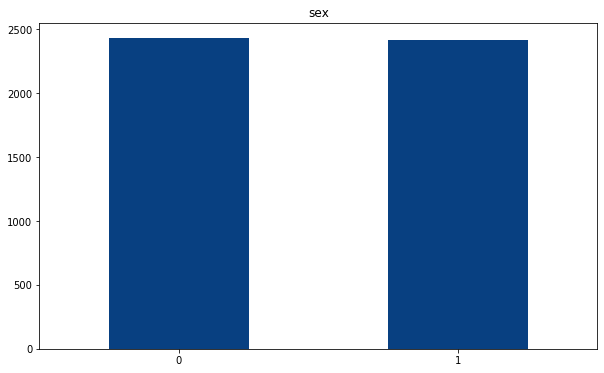

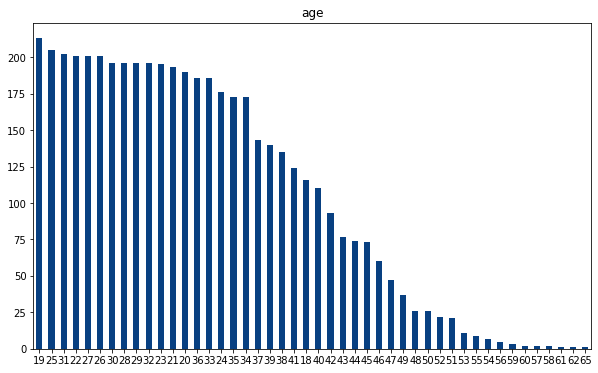

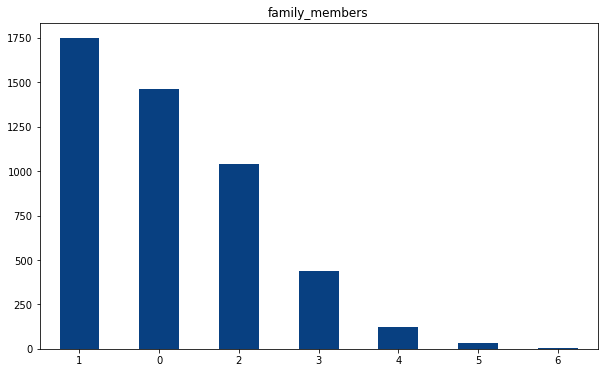

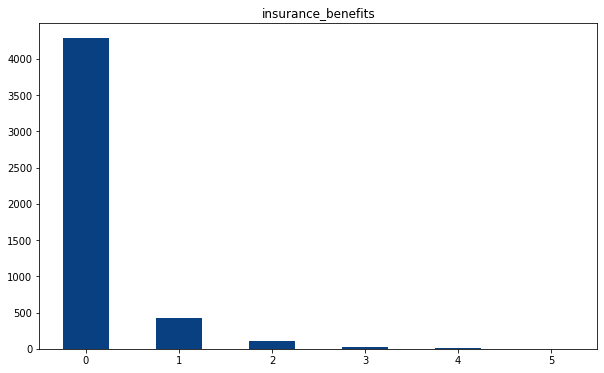

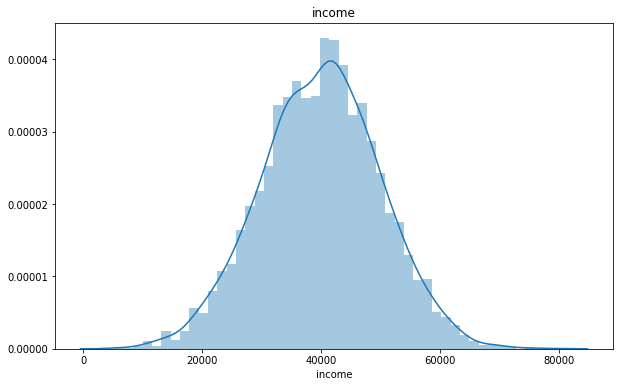

In [265]:
countplot = ['sex', 'age', 'family_members', 'insurance_benefits']
displot = ['income']

for col in countplot:
    values = df[col].value_counts()
    plt.figure(figsize=(10,6))
    values.plot(kind = 'bar', cmap = colormap)
    plt.xticks(rotation=0)
    plt.title(col)
    plt.show( )
    
for col in displot:
    plt.figure(figsize=(10,6))
    sns.distplot(df[col])
    plt.title(col)
    plt.show( )

- Clients of both sexes meet in equal proportions
- The services are mainly used by young people
- Mostly there are people with 1 child or without them
- The vast majority of clients have never received payments, which indicates the success of the business
- Client salaries are distributed close to the normal distribution, most clients have a salary of about 40 thousand

Let us evaluate the correlations of features.

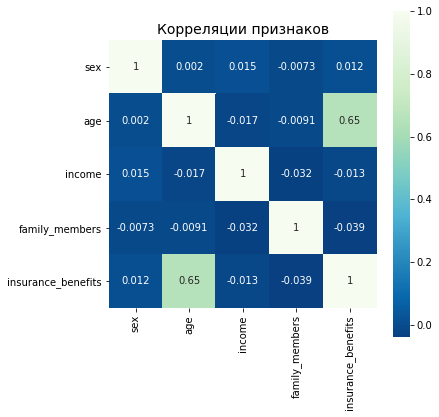

In [266]:
plt.figure(figsize = (6,6))
plt.title('Корреляции признаков', size=14)
sns.heatmap(df.corr(), annot = True, square=True, cmap = colormap)

It seems that there is a certain correlation between the age feature and the availability of insurance payments. This is probably due to the fact that older people had a proportionally greater amount of time (and hence probabilities) for making insured events.

###### Conclusion:

During this stage of the work, I loaded the libraries necessary for the work and the dataframe under researching, evaluated the data "at a glance", carried out pre-processing (checking for duplicates, for omissions, etc.), renamed the Russian-language column names to their English versions for standardization purposes, changed the format of values in the age column to integers, evaluated the distributions of values in all columns and evaluated their correlations. At this point, this stage of work is completed. I turn to the creation of an algorithm and its argumentation.

## Matrix multiplication

Designations:

- $X$ - feature matrix (zero column consists of ones)

- $y$ — target feature vector

- $P$ is the matrix by which features are multiplied

- $w$ — vector of linear regression weights (zero element equals shift)

Predictions:

$$
a = Xw
$$

Learning objective:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Answer:**

When multiplying the features by an invertible matrix, the quality of the linear regression **_does not change_**.

**Rationale:**

The new feature matrix is calculated as follows:

$$X' = XP$$
Therefore, the formula for the new weight vector $w'$ will be:

$$w' = ((XP)^{T} XP)^{-1} (XP)^{T} y = \\ 
     = (X^{T} P^{T}XP)^{-1}X^{T}P^{T}y  = \\ 
     = P^{-1} (X^{T} X)^{-1} (P^{T})^{-1} P^{T}X^{T}y = \\ 
     = P^{-1} w, $$

because

$$
w = (X^T X)^{-1} X^T y
$$

It is known that

$$(P^{T})^{-1} P^{T} = Е = 1$$
(E - identity matrix)

In this way:

$$ a' = X'w' = XPP^{-1}w = XEw = Xw= a $$

since the product of a matrix and the identity matrix is equal to the same matrix.
Accordingly, the indicators of linear regression will not change.

## Conversion algorithm

**Algorithm**

The algorithm must include a matrix by which data will be multiplied for encryption, and an inverse matrix for decryption. Accordingly, in the next step, I will create an object that takes data from the dataframe as input, multiplies them by a matrix that has passed the check for the possibility of its reversibility, and returns the data to its original state by multiplying them by the inverse matrix.

**Rationale**

Multiplying data by a matrix during training does not affect the quality of linear regression prediction, provided that the features for which the prediction is made were also multiplied by this matrix. Theoretical confirmation of what we received at the previous stage of work.

## Algorithm check

Select the target feature insurance_benefits from the dataframe

In [267]:
X = df.drop(columns='insurance_benefits')
y = df['insurance_benefits']

X.shape, y.shape

((4847, 4), (4847,))

I start creating the object described in the previous step.

In [268]:
class Encoder(TransformerMixin, BaseEstimator):
    
    
    def fit(self, X, y=None, random_state=None):
        if random_state:
            np.random.seed(random_state)
            
        X_dim = X.shape[1]
        Z = np.random.normal(size=(X_dim, X_dim))
        
        
        self.Z = Z
        self.X = X
        return self
    
    def check(self):
        ch = self.Z
        Z_rev = np.linalg.inv(ch)
        if np.allclose(np.dot(ch, Z_rev), np.eye(ch.shape[0])) is True:
            ans = "Матрица обратима"
        else:
            ans = "Матрица необратима"
        return ans
        
    
    def transform(self, X, y=None):  
        return X.dot(self.Z)

In [269]:
preparer = Encoder()
X_new = preparer.fit_transform(X, random_state=SEED)
print(preparer.check())

Матрица обратима


In [270]:
X.shape, X_new.shape

((4847, 4), (4847, 4))

Let's compare the transformed sample and the original one.

In [271]:
X.head(5)

,sex,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


In [272]:
X_new.head(5)

,0,1,2,3
0,38224.186641,61881.000420,49961.234837,-64280.684721
1,29313.558467,47428.845564,38278.822267,-49242.555394
2,16206.481556,26215.538233,21153.670838,-27212.472653
3,32110.072445,52006.047856,42004.453110,-54044.730722
4,20126.326163,32571.440926,26289.724215,-33824.037786


Great, the original data is impossible to know.

Model training and evaluation of their differences based on the r2 metric.

In [273]:
linreg = LinearRegression()

linreg.fit(X, y)
predict1 = linreg.predict(X)

linreg.fit(X_new, y)
predict2 = linreg.predict(X_new)

r2_x = r2_score(y, predict1)
r2_y = r2_score(y, predict2)

print('Метрика R2 до преобразования данных:', r2_x)
print('Метрика R2 после преобразования данных:', r2_y)
print()
if np.isclose(r2_x, r2_y) == True:
    print('Значения метрики r2 на практике не отличается')
else:
    print('Значения метрики r2 на практике отличается, необходимо провести дополнительные исследования')
    


Метрика R2 до преобразования данных: 0.4302010044852067
Метрика R2 после преобразования данных: 0.4302010044852057

Значения метрики r2 на практике не отличается


## General Conclusion

I made a researching of the possibility to encode a dataframe using matrices and without loss of the required information:
- Pre-preparation of initial data
- Theoretically confirmed the possibility of using matrices for lossless encoding and decoding
- Described data conversion algorithm
- The algorithm is tested in practice using the metric r2

Thus, such a method of data conversion has been developed so that it is difficult to recover personal information from them. The correctness of its work is substantiated.
The data is protected so that the quality of machine learning models is not degraded during transformation.
**Data of customers of the insurance company "Хоть Потоп" is under reliable protection.**